<a href="https://colab.research.google.com/github/LifeofAGeek/100-days-of-Applied-AI/blob/master/DIP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Identify Connected components**
2. **Print labelled image before post-processing and after post-processing**

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

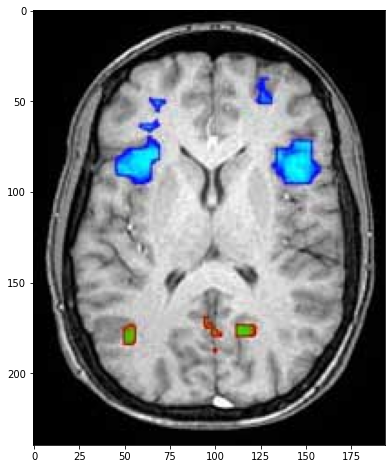

In [16]:
original_image = cv2.imread('/content/FMRIscan.jpg')
plt.figure(figsize=[8,8])
plt.imshow(original_image)

In [17]:
def to_grayscale(img):
    return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

In [18]:
grayscaled_image = to_grayscale(original_image)

In [19]:
x,thresholded_image = cv2.threshold(grayscaled_image,127,255,cv2.THRESH_BINARY)

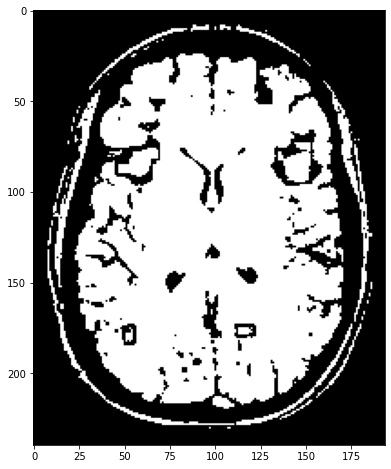

In [20]:
plt.figure(figsize=[8,8])
plt.imshow(thresholded_image,cmap='gray')

In [21]:
def get_flooded_image_using_scanline(image):
    count = 1
    n = False
    shape = image.shape
    img = np.zeros(shape)
    old_x = 0
    for x,y in np.ndindex(shape):
        if x != old_x:
            count += 1
        if(image[x,y]):
            img[x,y]=count
            n = True
            if (image[x-1,y] and x-1>=0):
                img = np.where(img==img[x-1,y], count, img) 
        if not image[x,y] and n:
            count += 2
        old_x = x
    return img

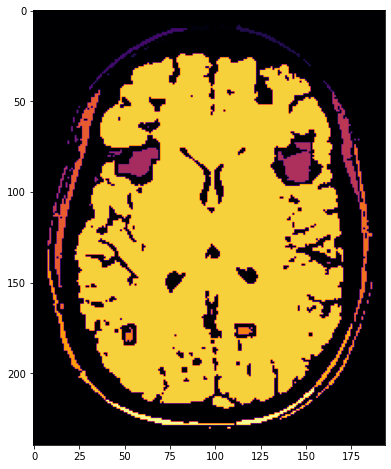

In [22]:
flooded_image = get_flooded_image_using_scanline(thresholded_image)
plt.figure(figsize=[8,8])
plt.imshow(flooded_image, cmap='inferno')

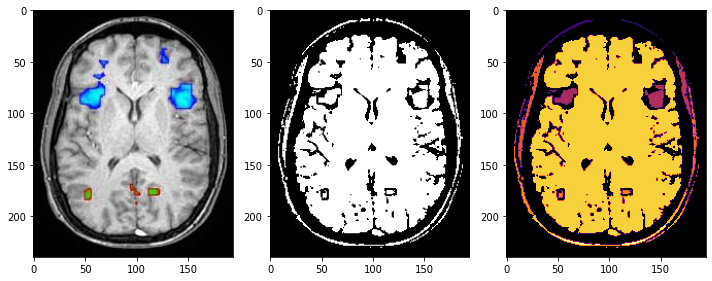

In [23]:
plt.figure(figsize=[10, 10])
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(thresholded_image, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(flooded_image, cmap="inferno")
plt.tight_layout()

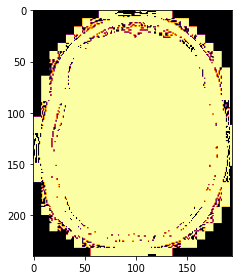

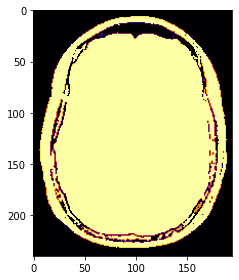

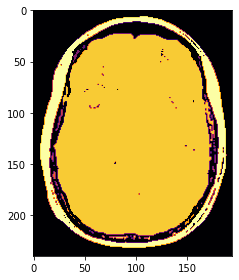

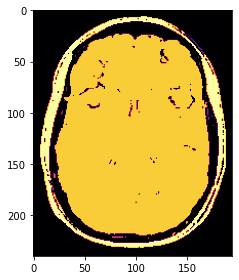

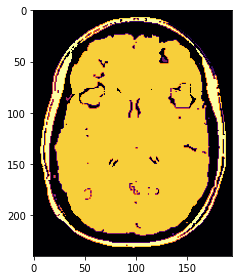

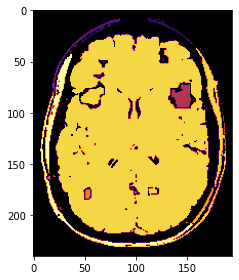

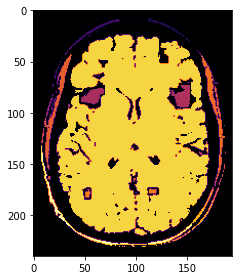

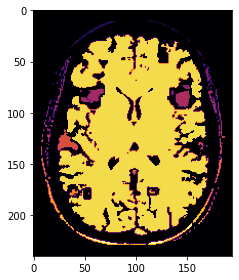

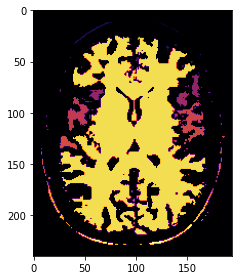

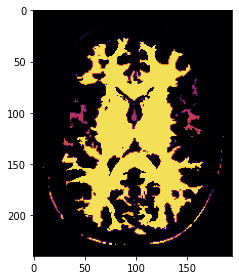

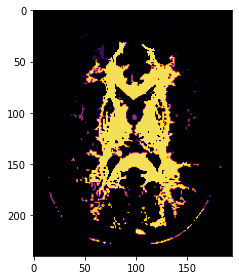

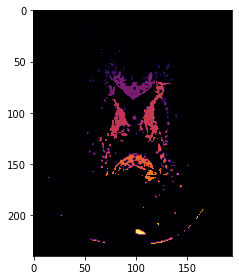

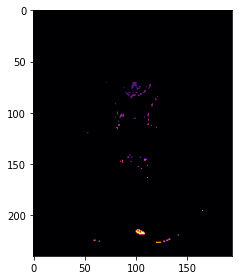

In [24]:
for i in range(0,255,20):
    x,thresholded_image = cv2.threshold(grayscaled_image,i,255,cv2.THRESH_BINARY)
    flooded_image = get_flooded_image_using_scanline(thresholded_image)
    plt.figure(figsize=[4,4])
    plt.imshow(flooded_image, cmap='inferno')
    plt.tight_layout()